In [2]:
#Importing packages
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter

import seaborn as sns

In [6]:
#Importing the data as panda dataframe
df_fthb = pd.read_csv('csv/dbFTHB2018.csv')

print(df_fthb.info())

#Dropping the empty columns (columns with 0 non-null count):
df_fthb = df_fthb.drop(['SYMBOL', 'TERMINATED'], axis=1)

# #Dropping columns that do not contribute information for the analysis:
df_fthb = df_fthb.drop(['STATUS','DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 
                                    'VECTOR', 'COORDINATE', 'DECIMALS'], axis=1)

df_fthb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REF_DATE                     912 non-null    int64  
 1   GEO                          912 non-null    object 
 2   DGUID                        912 non-null    object 
 3   Dwelling tenure              912 non-null    object 
 4   Selected housing indicators  912 non-null    object 
 5   Statistics                   912 non-null    object 
 6   UOM                          912 non-null    object 
 7   UOM_ID                       912 non-null    int64  
 8   SCALAR_FACTOR                912 non-null    object 
 9   SCALAR_ID                    912 non-null    int64  
 10  VECTOR                       912 non-null    object 
 11  COORDINATE                   912 non-null    object 
 12  VALUE                        832 non-null    float64
 13  STATUS              

,REF_DATE,GEO,Dwelling tenure,Selected housing indicators,Statistics,VALUE
0,2018,"Montréal, Quebec",Owner who is a first-time homebuyer,"Total, structural type of dwelling",Number of households,150300.0
1,2018,"Montréal, Quebec",Owner who is a first-time homebuyer,"Total, structural type of dwelling",Percentage of households,100.0
2,2018,"Montréal, Quebec",Owner who is a first-time homebuyer,Single-detached house,Number of households,57200.0
3,2018,"Montréal, Quebec",Owner who is a first-time homebuyer,Single-detached house,Percentage of households,38.0
4,2018,"Montréal, Quebec",Owner who is a first-time homebuyer,Semi-detached house,Number of households,13400.0
...,...,...,...,...,...,...
907,2018,"Vancouver, British Columbia",Renter,Moved for personal health reasons,Percentage of households,5.8
908,2018,"Vancouver, British Columbia",Renter,Moved to become a homeowner,Number of households,5400.0
909,2018,"Vancouver, British Columbia",Renter,Moved to become a homeowner,Percentage of households,1.4
910,2018,"Vancouver, British Columbia",Renter,Moved for another reason,Number of households,6400.0


In [12]:
df_fthb = df_fthb[df_fthb['GEO'].isin(['Calgary, Alberta', 'Toronto, Ontario','Vancouver, British Columbia'])]

# Remove the 'Percentage of households' field
df_fthb = df_fthb[df_fthb['Statistics'].isin(['Number of households'])]

df_fthb

df_fthb = df_fthb.drop(['Statistics'], axis=1)

In [17]:
df_fthb = df_fthb.rename(columns={"REF_DATE": "Year", "GEO": "City", "Dwelling tenure": "Tenure", "Selected housing indicators": "Indicator", "VALUE": "Value"})

In [18]:
df_renter = df_fthb[df_fthb['Tenure'].isin(['Renter'])]
df_renter

,Year,City,Tenure,Indicator,Value
380,2018,"Toronto, Ontario",Renter,"Total, structural type of dwelling",776000.0
382,2018,"Toronto, Ontario",Renter,Single-detached house,47500.0
384,2018,"Toronto, Ontario",Renter,Semi-detached house,23300.0
386,2018,"Toronto, Ontario",Renter,Row house,34000.0
388,2018,"Toronto, Ontario",Renter,Apartment or flat in a duplex,28100.0
...,...,...,...,...,...
902,2018,"Vancouver, British Columbia",Renter,Moved to reduce housing costs,54300.0
904,2018,"Vancouver, British Columbia",Renter,Moved to be in a more desirable neighbourhood,80100.0
906,2018,"Vancouver, British Columbia",Renter,Moved for personal health reasons,21800.0
908,2018,"Vancouver, British Columbia",Renter,Moved to become a homeowner,5400.0


In [19]:
df_renter.Indicator.unique()

array(['Total, structural type of dwelling', 'Single-detached house',
       'Semi-detached house', 'Row house',
       'Apartment or flat in a duplex',
       'Apartment in a building that has five or more storeys',
       'Apartment in a building that has fewer than five storeys',
       'Other single-attached house', 'Moveable dwelling',
       'Total, condominium status', 'Condominium', 'Not condominium',
       'Total, satisfaction with dwelling',
       'Very satisfied with dwelling', 'Satisfied with dwelling',
       'Neither satisfied nor dissatisfied with dwelling',
       'Dissatisfied with dwelling', 'Very dissatisfied with dwelling',
       'Total, satisfaction with neighbourhood',
       'Very satisfied with neighbourhood',
       'Satisfied with neighbourhood',
       'Neither satisfied nor dissatisfied with neighbourhood',
       'Dissatisfied with neighbourhood',
       'Very dissatisfied with neighbourhood',
       'Moved because the household was forced to move by a l

In [52]:
df_renterHouseType = df_renter[df_renter['Indicator'].isin(['Single-detached house',
       'Semi-detached house', 'Row house',
       'Apartment or flat in a duplex',
       'Apartment in a building that has five or more storeys',
       'Apartment in a building that has fewer than five storeys',
       'Other single-attached house', 'Moveable dwelling',])]
df_profile = df_renterHouseType.groupby(['Year', 'City','Indicator']).Value.mean()
df_profileCAL = df_renterHouseType[df_renterHouseType['City'].isin(['Calgary, Alberta'])]
df_profileTO = df_renterHouseType[df_renterHouseType['City'].isin(['Toronto, Ontario'])]
df_profileVAN = df_renterHouseType[df_renterHouseType['City'].isin(['Vancouver, British Columbia'])]
df_profileCAL = df_profileCAL.dropna()
df_profileTO = df_profileTO.dropna()
df_profileVAN = df_profileVAN.dropna()

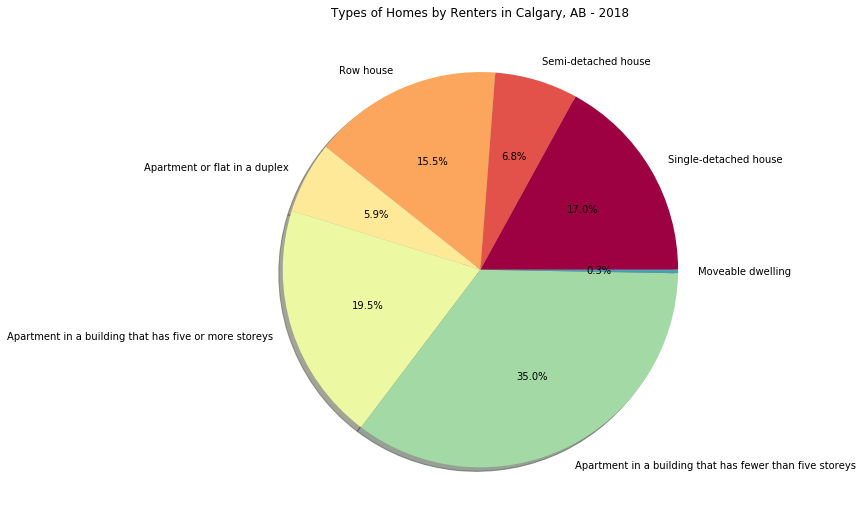

In [51]:
CALind = df_profileCAL['Indicator'].to_list()
CALval = df_profileCAL['Value'].to_list()

from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Types of Homes by Renters in Calgary, AB - 2018')
type_show_ids = plt.pie(CALval, labels=CALind, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

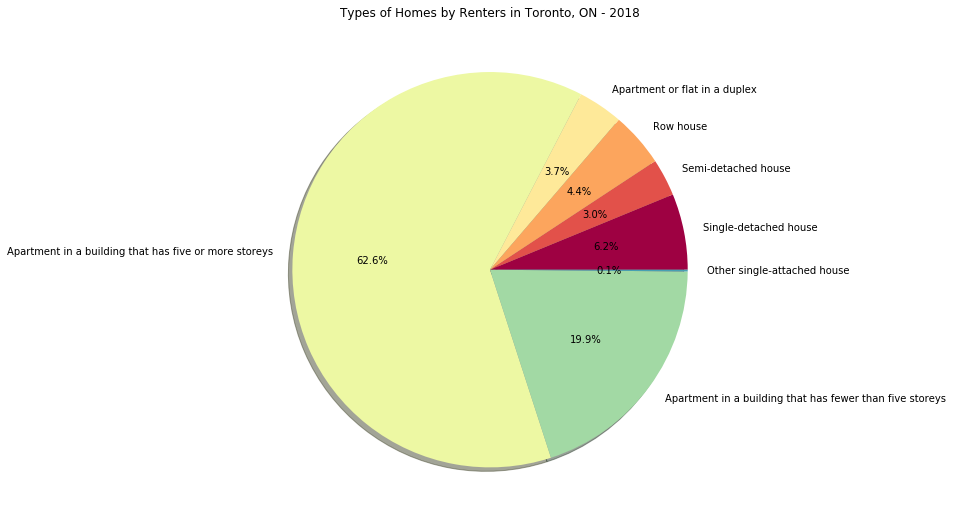

In [54]:
TOind = df_profileTO['Indicator'].to_list()
TOval = df_profileTO['Value'].to_list()

from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Types of Homes by Renters in Toronto, ON - 2018')
type_show_ids = plt.pie(TOval, labels=TOind, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

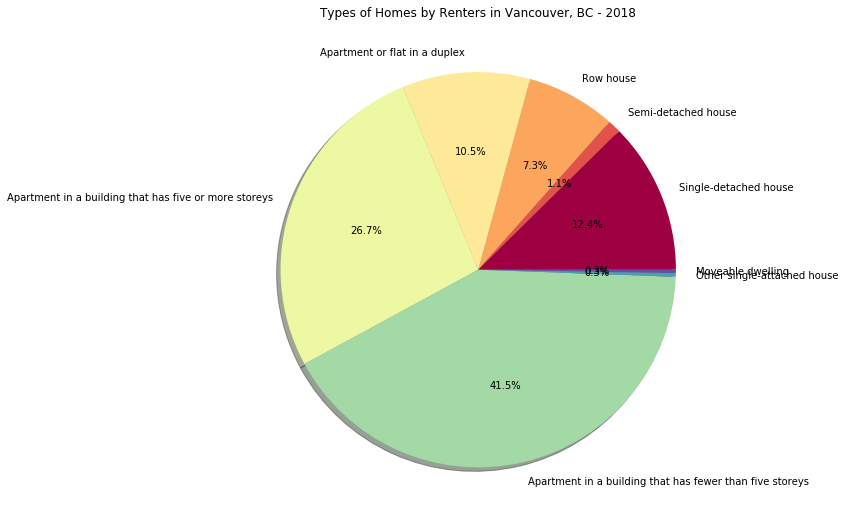

In [55]:
VANind = df_profileVAN['Indicator'].to_list()
VANval = df_profileVAN['Value'].to_list()

from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Types of Homes by Renters in Vancouver, BC - 2018')
type_show_ids = plt.pie(VANval, labels=VANind, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [57]:
df_owner = df_fthb[df_fthb['Tenure'].isin(['Owner who is a first-time homebuyer'])]
df_owner.dropna()
df_owner

,Year,City,Tenure,Indicator,Value
304,2018,"Toronto, Ontario",Owner who is a first-time homebuyer,"Total, structural type of dwelling",208800.0
306,2018,"Toronto, Ontario",Owner who is a first-time homebuyer,Single-detached house,55100.0
308,2018,"Toronto, Ontario",Owner who is a first-time homebuyer,Semi-detached house,21500.0
310,2018,"Toronto, Ontario",Owner who is a first-time homebuyer,Row house,17900.0
312,2018,"Toronto, Ontario",Owner who is a first-time homebuyer,Apartment or flat in a duplex,3300.0
...,...,...,...,...,...
826,2018,"Vancouver, British Columbia",Owner who is a first-time homebuyer,Moved to reduce housing costs,5000.0
828,2018,"Vancouver, British Columbia",Owner who is a first-time homebuyer,Moved to be in a more desirable neighbourhood,15800.0
830,2018,"Vancouver, British Columbia",Owner who is a first-time homebuyer,Moved for personal health reasons,2100.0
832,2018,"Vancouver, British Columbia",Owner who is a first-time homebuyer,Moved to become a homeowner,54600.0


In [59]:
df_ownerHouseType = df_owner[df_owner['Indicator'].isin(['Single-detached house',
       'Semi-detached house', 'Row house',
       'Apartment or flat in a duplex',
       'Apartment in a building that has five or more storeys',
       'Apartment in a building that has fewer than five storeys',
       'Other single-attached house', 'Moveable dwelling',])]

df_profileCAL = df_ownerHouseType[df_ownerHouseType['City'].isin(['Calgary, Alberta'])]
df_profileTO = df_ownerHouseType[df_ownerHouseType['City'].isin(['Toronto, Ontario'])]
df_profileVAN = df_ownerHouseType[df_ownerHouseType['City'].isin(['Vancouver, British Columbia'])]
df_profileCAL = df_profileCAL.dropna()
df_profileTO = df_profileTO.dropna()
df_profileVAN = df_profileVAN.dropna()

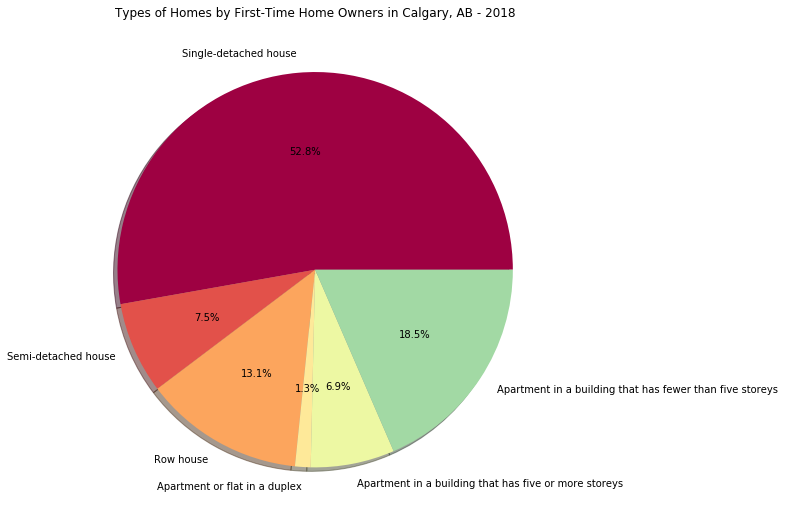

In [61]:
CALind = df_profileCAL['Indicator'].to_list()
CALval = df_profileCAL['Value'].to_list()

from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Types of Homes by First-Time Home Owners in Calgary, AB - 2018')
type_show_ids = plt.pie(CALval, labels=CALind, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

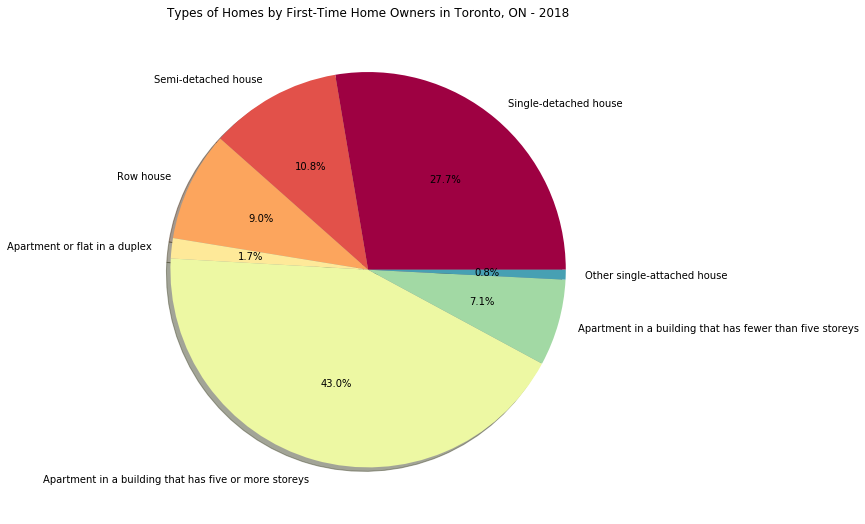

In [62]:
TOind = df_profileTO['Indicator'].to_list()
TOval = df_profileTO['Value'].to_list()

from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Types of Homes by First-Time Home Owners in Toronto, ON - 2018')
type_show_ids = plt.pie(TOval, labels=TOind, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

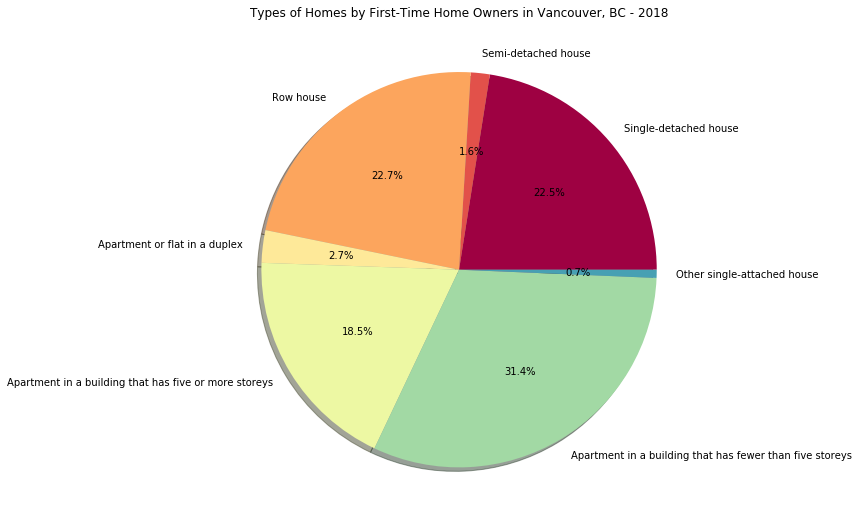

In [63]:
VANind = df_profileVAN['Indicator'].to_list()
VANval = df_profileVAN['Value'].to_list()

from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Types of Homes by First-Time Home Owners in Vancouver, BC - 2018')
type_show_ids = plt.pie(VANval, labels=VANind, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()